age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      3

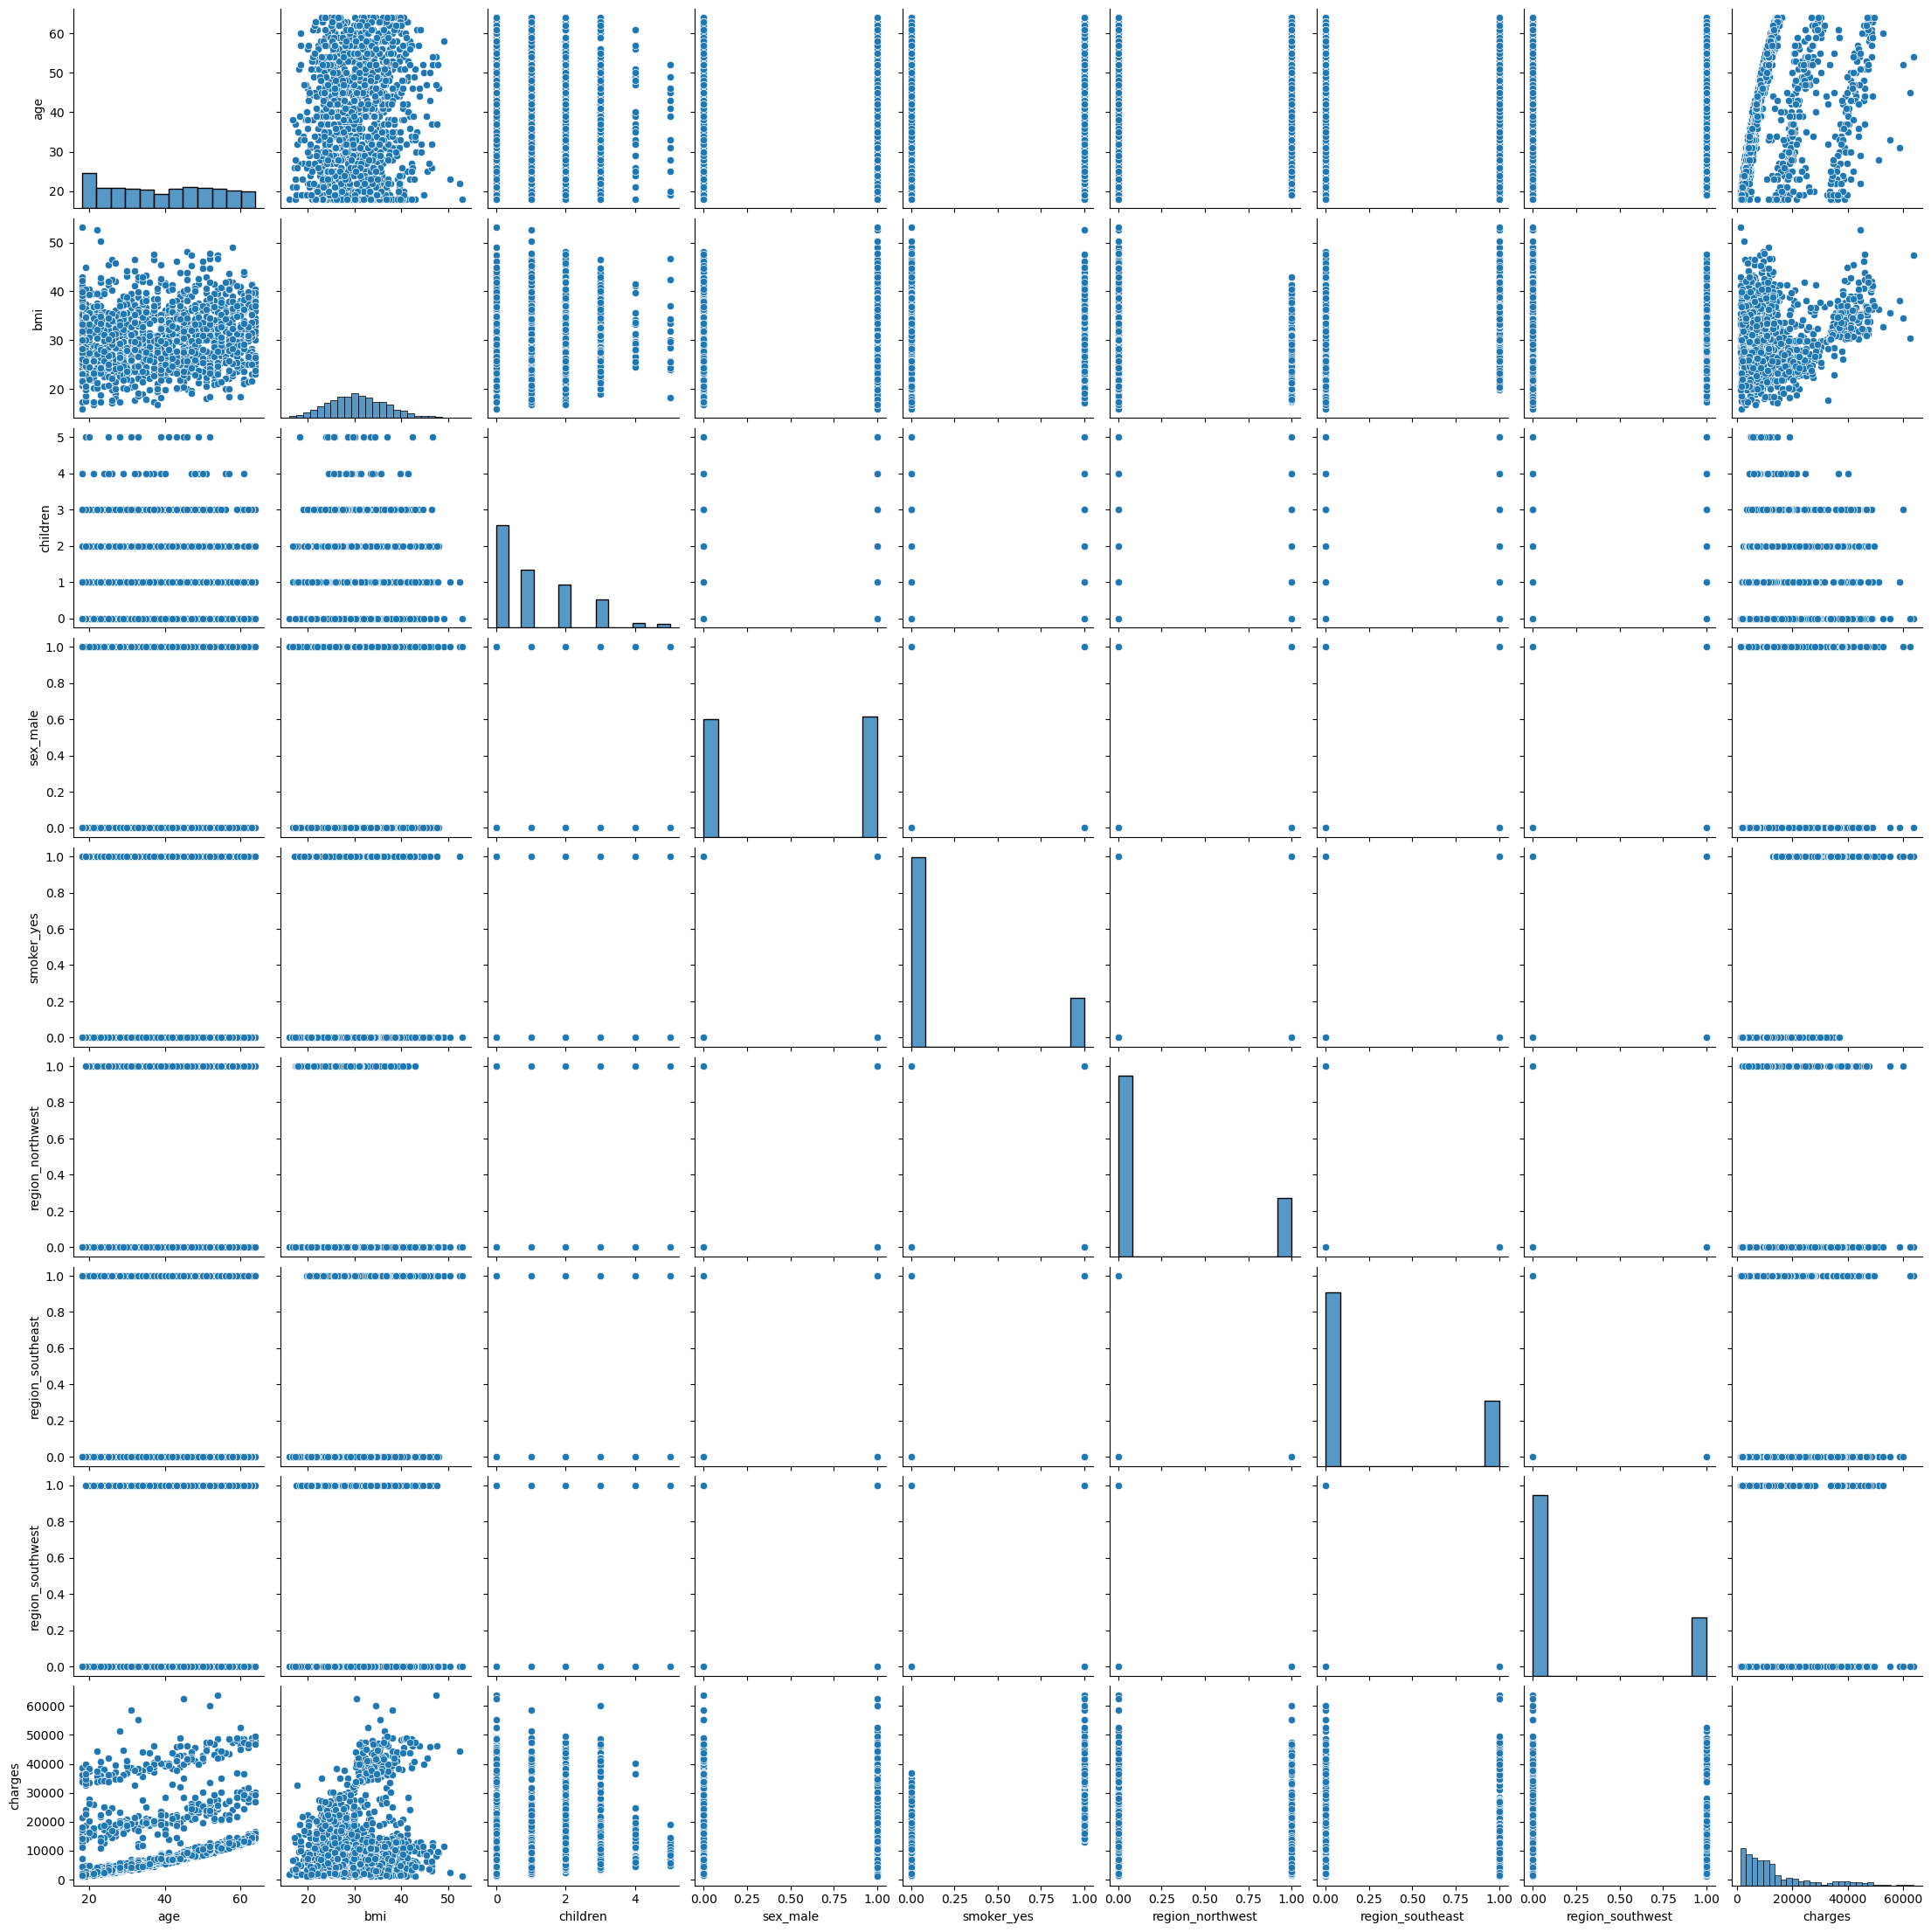

C:\Users\Hp\AppData\Local\Temp\ipykernel_36048\3677344876.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dum['charges'])


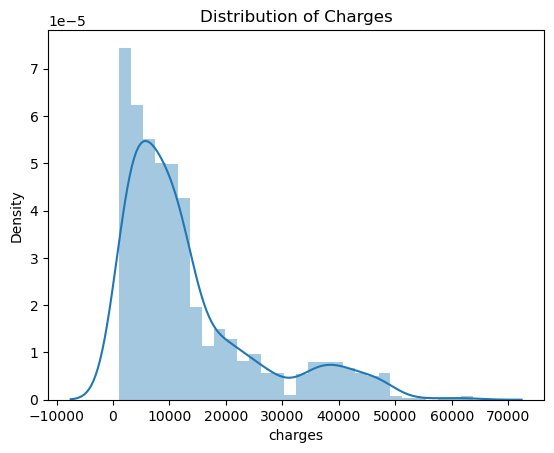

Mean of charges is 13270.422265141257


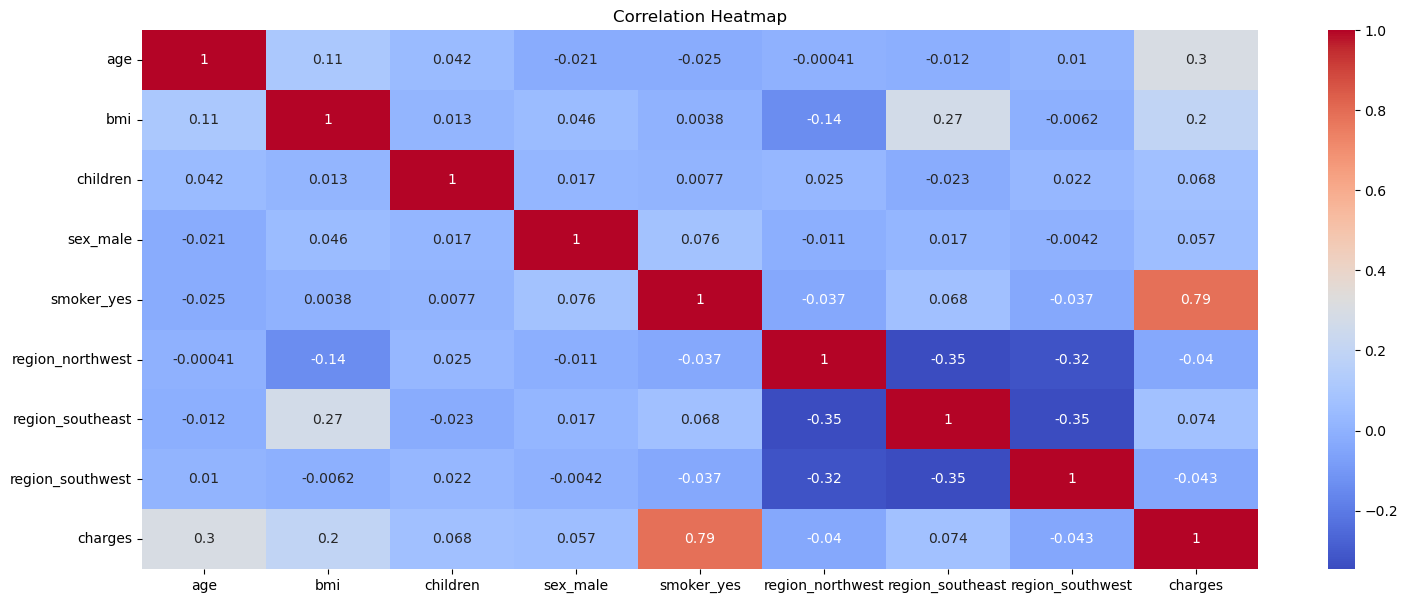

The intercept is -11830.462735295923
Coefficients: [  255.64732788   342.67603001   451.58728746   -83.44168965
 23501.01101688  -419.22013163 -1033.27367827 -1026.3479329 ]


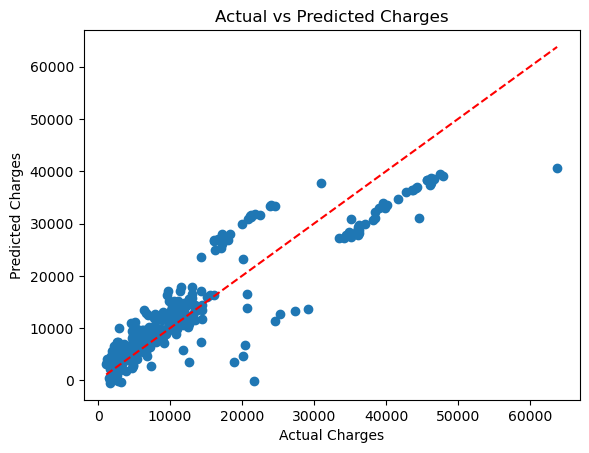

Mean Absolute Error: 4013.1006181134785
Mean Squared Error: 30552437.416525472
Root Mean Absolute Error: 63.34903802042679
R² Score: 0.8001744488359047
Lasso Mean Absolute Error: 4014.1064749007937
Lasso Mean Squared Error: 30555477.747026704
Lasso R² Score: 0.8001545638195361
Ridge Mean Absolute Error: 4025.686714079457
Ridge Mean Squared Error: 30631770.64164655
Ridge R² Score: 0.7996555767989761
ElasticNet Mean Absolute Error: 7492.18231147238
ElasticNet Mean Squared Error: 95853478.87102787
ElasticNet R² Score: 0.37307868484368656


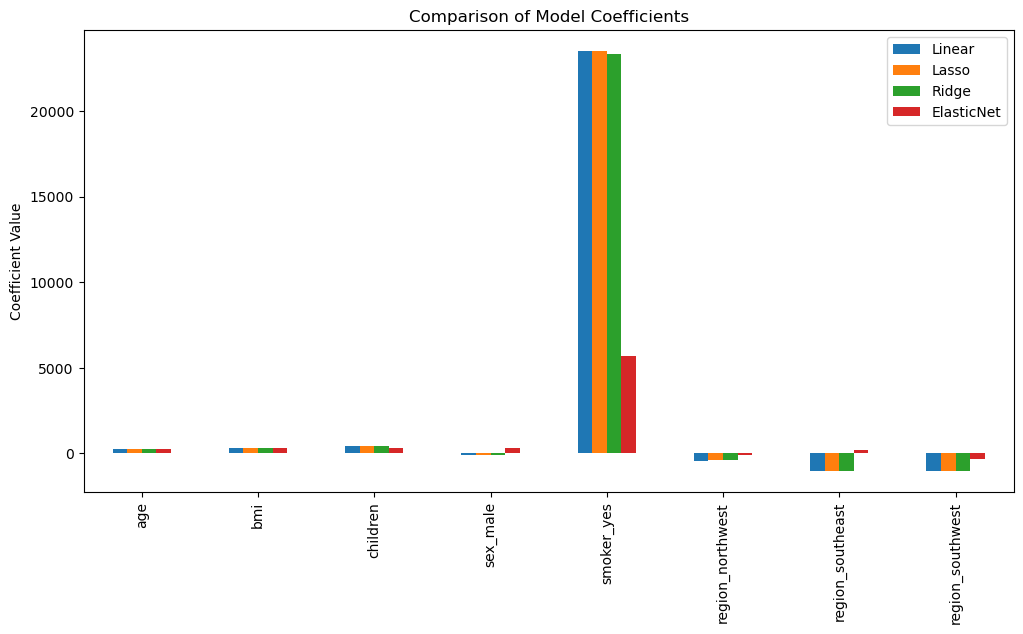

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
insurance = pd.read_csv(r'D:\Machine learning\task\data\insurance.csv')

# Check for null values
print(insurance.isnull().sum())

# Data types and summary statistics
print(insurance.info())
print(insurance.describe())

# Create dummy variables for categorical features
insurance_dum = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'], drop_first=True)

# Re-order the columns for better readability
columns = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 
           'region_northwest', 'region_southeast', 'region_southwest', 'charges']
insurance_dum = insurance_dum.reindex(columns=columns)

# Exploratory Data Analysis
sns.pairplot(insurance_dum)
plt.show()

sns.distplot(insurance_dum['charges'])
plt.title('Distribution of Charges')
plt.show()
print('Mean of charges is', insurance_dum['charges'].mean())

plt.figure(figsize=(18, 7))
sns.heatmap(insurance_dum.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Prepare for Linear Regression
X = insurance_dum.drop('charges', axis=1)
y = insurance_dum['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Display the intercept and coefficients
print('The intercept is', lr.intercept_)
print('Coefficients:', lr.coef_)

# Charges prediction
y_pred_linear = lr.predict(X_test)

# Scatter plot for actual vs predicted
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal line
plt.show()

# Evaluation Metrics
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred_linear)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_linear)}')
print(f'Root Mean Absolute Error: {np.sqrt(mean_absolute_error(y_test, y_pred_linear))}')
print(f'R² Score: {r2_score(y_test, y_pred_linear)}')

# Comparing to other regression models
models = {
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
    print(f'{name} Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'{name} R² Score: {r2_score(y_test, y_pred)}')

# Optional: Visualizing coefficients for comparison
coef_df = pd.DataFrame({
    'Linear': lr.coef_,
    'Lasso': models['Lasso'].coef_,
    'Ridge': models['Ridge'].coef_,
    'ElasticNet': models['ElasticNet'].coef_
}, index=X.columns)

coef_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Model Coefficients')
plt.ylabel('Coefficient Value')
plt.show()
